In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [3]:
data.shape

(569, 32)

In [6]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [ ]:
#Split the dataset into input and output--> Train and test
#Train--> Building the model
#Test--> How well the model has learnt(Generaize on unseen data)

In [8]:
# Preparing Input and Output
# Drop the id and diagnosisi columns
X = data.drop(['id', 'diagnosis'], axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [9]:
# Acessing Output Column
y = data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [10]:
#Preparing Training and Testing Data
# Storing 70% of the data(569 rows) into training and remaining 30% of the data into testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[ 0.0654828 , -1.35518629,  0.03134589, ..., -0.04689041,
         0.3683001 , -1.22806684],
       [-0.77639967, -0.1225787 , -0.77192193, ..., -0.39868555,
         0.3648074 , -0.83648993],
       [-0.84936282, -1.05782571, -0.87563499, ..., -1.03880764,
        -1.65746674, -0.54459715],
       ...,
       [-0.88303812, -0.35998755, -0.85204535, ..., -0.1993652 ,
        -0.98162901, -0.01313199],
       [ 1.07854805,  0.213151  ,  0.91351698, ...,  0.10120204,
         3.54665843, -1.20658794],
       [-0.26846391, -0.90674734, -0.26149099, ..., -0.22037015,
         1.74267813,  0.1823811 ]])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_train
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.767981,-0.055433,-0.795918,-0.721932,-0.589333,-0.996232,-0.780212,-0.661564,0.810759,-0.417646,...,-0.785433,0.137175,-0.806874,-0.716765,-0.854530,-0.972772,-0.923478,-0.752143,0.726302,-0.720284
1,-0.116925,-0.731688,-0.158591,-0.209416,-0.875377,-0.728226,-0.760262,-0.697520,0.281483,-0.839423,...,-0.273344,-0.865993,-0.216452,-0.348722,-0.911689,-0.222689,-0.624656,-0.633669,0.824098,-0.330910
2,1.100998,-0.544639,1.047734,0.940735,-0.426476,0.438365,0.300001,0.371772,-0.289084,-0.675726,...,0.870599,-0.559798,0.797992,0.733636,-0.216988,0.157285,0.858626,0.630104,-0.015897,-0.042321
3,-0.922326,1.220340,-0.929322,-0.818221,-0.951934,-0.683493,-0.888348,-1.005166,0.671871,0.132434,...,-0.647087,1.035458,-0.669891,-0.636120,-0.476402,-0.531335,-0.990740,-1.196269,0.363061,-0.372215
4,0.570612,-1.021855,0.510866,0.408905,-0.045084,-0.310914,-0.386171,-0.065263,-0.232778,-0.535625,...,0.319276,-0.972569,0.280965,0.134281,-0.467608,-0.472006,-0.138962,0.016578,-0.127664,-0.710370
5,0.118802,0.052480,0.102115,0.016191,-0.815524,-0.448449,0.035316,-0.471153,-1.216256,-0.725867,...,0.028129,0.517804,0.049193,-0.070207,-0.982038,0.145952,0.601168,-0.239713,-0.663793,-0.461986
6,-0.234789,-1.045835,-0.284674,-0.286112,-1.534461,-0.987011,-0.670679,-0.541291,-1.542830,-1.357058,...,0.040518,-0.503973,-0.057778,-0.070033,-1.346975,-0.794651,-0.622640,-0.176849,-1.439173,-1.154268
7,0.312435,2.757502,0.474262,0.176300,0.640447,2.115854,2.155208,1.175703,1.242437,1.347624,...,0.280044,2.953826,0.661307,0.076976,0.460125,3.657716,4.592021,1.870756,2.161802,3.187775
8,-1.310714,-0.192123,-1.298215,-1.050547,0.369018,-0.810237,-0.740694,-0.855774,-1.092383,1.062998,...,-0.855639,-0.052293,-0.910874,-0.751079,0.090790,-0.920642,-0.726430,-0.926076,-0.693481,-0.091337
9,1.072936,1.285088,0.954189,0.965647,-0.490505,-0.600109,-0.360885,-0.010570,-0.972263,-1.073907,...,0.982102,1.583563,0.851478,0.782407,0.011647,-0.416010,-0.254843,0.027156,-0.606164,-0.194877


In [25]:
# Model Building:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=40, metric='euclidean')

# Apply the knn object on the dataset
# syntax: objectName.fit(Input, Output0)
knn.fit(scaled_X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=40, p=2,
                     weights='uniform')

In [17]:
# Predictions on the data
# predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [26]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       257
           M       1.00      0.94      0.97       141

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.98      0.98       398



In [27]:
from sklearn.metrics import accuracy_score
# Checking for optimum k-value
# Build the models with multiple k values
scores=[]
for k in range(1, 20):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train, y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test, pred_test))
scores

[0.9181286549707602,
 0.9473684210526315,
 0.9590643274853801,
 0.9415204678362573,
 0.9590643274853801,
 0.9590643274853801,
 0.9649122807017544,
 0.9532163742690059,
 0.9590643274853801,
 0.9532163742690059,
 0.9532163742690059,
 0.9415204678362573,
 0.9473684210526315,
 0.935672514619883,
 0.9473684210526315,
 0.9415204678362573,
 0.9415204678362573,
 0.9415204678362573,
 0.9473684210526315]

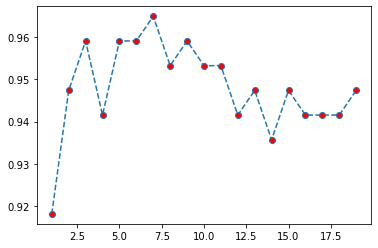

In [30]:
# Plot of K values and scores
plt.plot(range(1,20), scores, marker='o', markerfacecolor='r', linestyle='--')

In [31]:
#  Optimum k value is 7
final_model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
final_model.fit(scaled_X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [32]:
# Prediction on training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

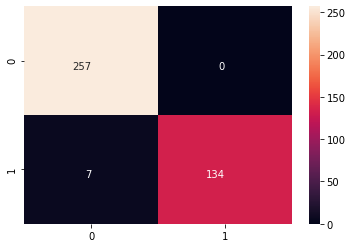

In [39]:
from sklearn.metrics import confusion_matrix;
sns.heatmap(confusion_matrix(y_train, final_train_pred), annot=True, fmt='d', annot_kws={'va':'top', 'ha':'right'})

In [40]:
# Classification report
print(classification_report(y_train, final_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       257
           M       1.00      0.95      0.97       141

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [41]:
# Predictions on Test Data
final_test_pred = final_model.predict(scaled_X_test)
final_test_pred

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

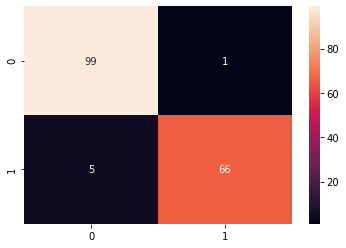

In [42]:
# compare actual values of test data(y_test) and final_test_pred(model predicted values)
sns.heatmap(confusion_matrix(y_test, final_test_pred), annot=True, fmt='d')

In [43]:
# Classification Report for Test Data
print(classification_report(y_test, final_test_pred))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97       100
           M       0.99      0.93      0.96        71

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

